<a href="https://colab.research.google.com/github/wliberatoc/PI/blob/main/28_09_Tarefas_da_Segunda_Semana_(ERE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Extração de Região de Interesse (ROI)

Dessa vez você vai criar uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

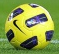

Imagem original


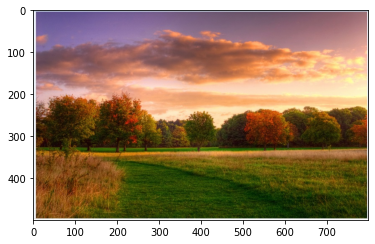

digite a posição x: 350
digite a posição y: 200
digite a largura: 120
digite a altura: 150
Imagem Cortada


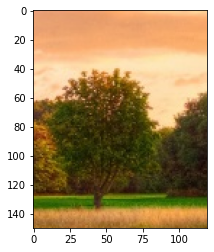

True

In [ ]:
import numpy as np
import cv2

def crop(imagem, x, y, l, a): #função que recorta a imagem nas poições passadas
  img_cortada = imagem[y:y+a, x:x+l]
  return img_cortada

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/fundo.jpg")
from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem original")
plt.imshow(img)
plt.show()
x = int(input("digite a posição x: "))
y = int(input("digite a posição y: "))
largura = int(input("digite a largura: "))
altura = int(input("digite a altura: "))
img_cortada = crop(img, x, y, largura, altura)
print("Imagem Cortada")
plt.imshow(img_cortada)
plt.show()
img_cortada = cv2.cvtColor(img_cortada, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/PI/img_cortada.jpg', img_cortada)

# 2. Colar Imagem

Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

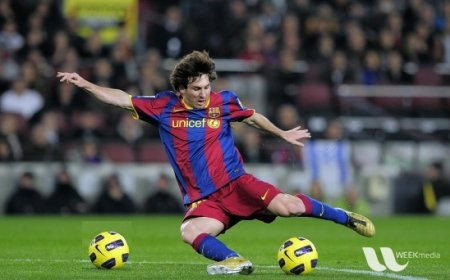

digite a posição x: 150
digite a posição y: 250
Imagem original + parte colada


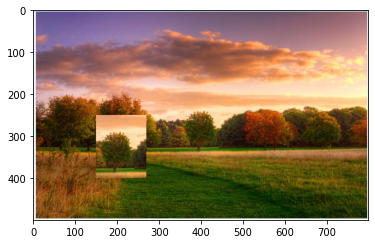

In [ ]:
import numpy as np
import cv2

def paste(original, parte, x, y): #cola a imagem cortada na imagem original nas posições passadas
  altura1, largura1, canais = parte.shape
  larguraF = largura1 + x
  alturaF = altura1+y
  original[y:alturaF, x:larguraF] = parte
  return original

imagem_original = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/fundo.jpg")
parte_cortada = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/img_cortada.jpg") 
x = int(input("digite a posição x: "))
y = int(input("digite a posição y: "))

from matplotlib import  pyplot as plt
imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
parte_cortada = cv2.cvtColor(parte_cortada, cv2.COLOR_BGR2RGB)
imagem_original = paste(imagem_original,parte_cortada,x,y)
print("Imagem original + parte colada")
plt.imshow(imagem_original)
plt.show()

# 3. Trabalhando com Canais de Cores

Dessa vez, você deverá criar um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

Imagem Original


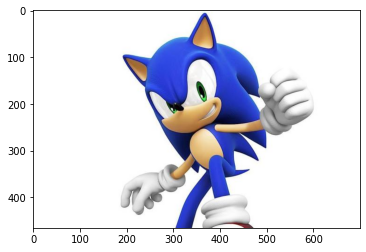

Canal Vermelho


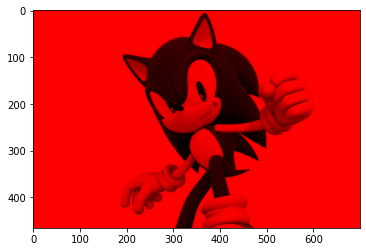

Media do canal vermelho:  0.5061542174562472


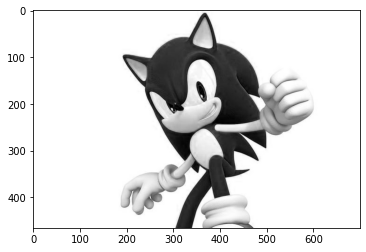

Canal Verde


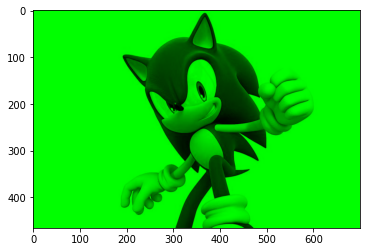

Media do canal verde:  0.5038825978249303


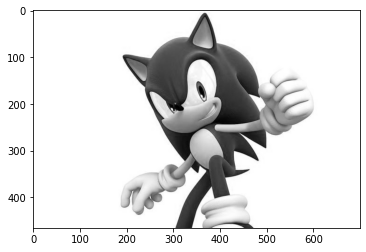

Canal Azul


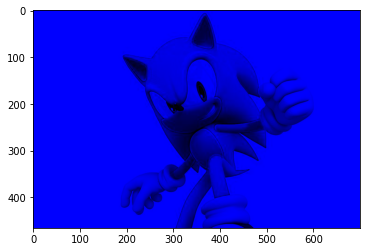

Media do canal azul:  0.5162554132486246


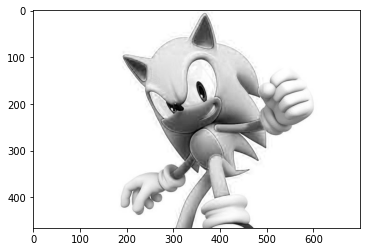

A imagem é mais azul.


In [ ]:
import numpy as np
import cv2

def getVermelho(img):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  for y in range(0, altura):
    for x in range(0, largura):
      imagem.itemset((y,x,1),0)
      imagem.itemset((y,x,2),0)
  return imagem

def getVerde(img):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  for y in range(0, altura):
    for x in range(0, largura):
      imagem.itemset((y,x,0),0)
      imagem.itemset((y,x,2),0)
  return imagem

def getAzul(img):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  for y in range(0, altura):
    for x in range(0, largura):
      imagem.itemset((y,x,0),0)
      imagem.itemset((y,x,1),0)
  return imagem

def getCinza(img, canalDominante):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  media = 0
  for y in range(0, altura):
    for x in range(0, largura):
      dominante = imagem.item(y,x,canalDominante)
      imagem.itemset((y,x,0),dominante)
      imagem.itemset((y,x,1),dominante)
      imagem.itemset((y,x,2),dominante)
      media = media + dominante
    media = media/(altura*largura) 
  return imagem,media


img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/sonic.jpg")

from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = getVermelho(img)
g = getVerde(img)
b = getAzul(img)
print("Imagem Original")
plt.imshow(img)
plt.show()
print("Canal Vermelho")
plt.imshow(r)
plt.show()
mR, mediaR = getCinza(r, 0)
print("Media do canal vermelho: ", mediaR)
plt.imshow(mR)
plt.show()
print("Canal Verde")
plt.imshow(g)
plt.show()
mG, mediaG = getCinza(g, 1)
print("Media do canal verde: ", mediaG)
plt.imshow(mG)
plt.show()
print("Canal Azul")
plt.imshow(b)
plt.show()
mB, mediaB = getCinza(b, 2)
print("Media do canal azul: ", mediaB)
plt.imshow(mB)
plt.show()
if mediaR > mediaG and mediaR > mediaB:
  print("A imagem é mais vermelha.")
elif mediaG > mediaR and mediaG > mediaB:
  print("A imagem é mais verde.")
elif mediaB > mediaR and mediaB > mediaG:
  print("A imagem é mais azul.")
else:
  print("A imagem não tem predominancia de nenhuma das cores primárias do RGB.")

# 4. Criando o ouriço brasileiro

Existe um jogo na Internet chamado "Brasonic", que consiste numa versão tupiniquim do ouriço mais popular dos jogos, Sonic. Basicamente, ele é uma versão do personagem trocando suas cores pelo verde e amarelo da bandeira nacional.

Nesse exercício, você deverá fazer um algoritmo que "recebe" uma imagem do Sonic e "troca" suas cores para o verde e amarelo. Para tal, modifique os pixels e salve a nova imagem em disco!

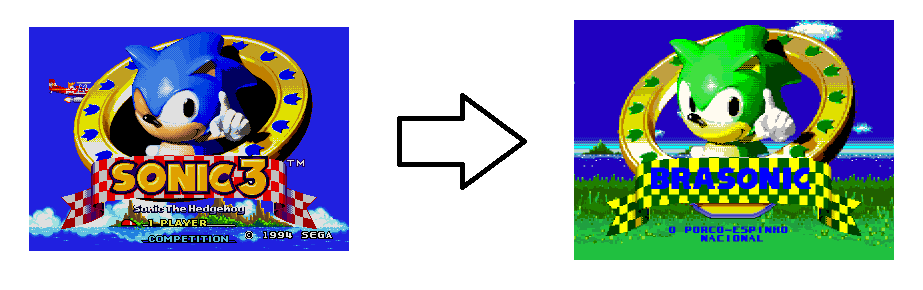

Imagem original


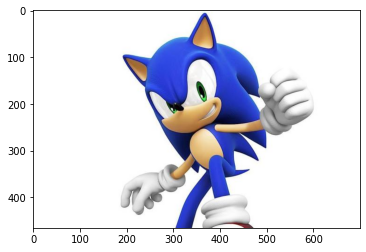

Ourição BR


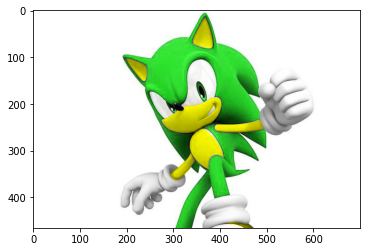

In [ ]:
def sinaliza_as_cores(imagem, y, x):
  R = imagem.item(y,x,0)
  G = imagem.item(y,x,1)
  B = imagem.item(y,x,2)
  cor_media = (R+G+B)/3
  if R >= (cor_media+15):
    propensao_ao_R = True
  else:
    propensao_ao_R = False
  if G >= (cor_media+15):
    propensao_ao_G = True
  else:
    propensao_ao_G = False
  if B >= (cor_media+15):
    propensao_ao_B = True
  else:
    propensao_ao_B = False

  if not propensao_ao_R and not propensao_ao_G and not propensao_ao_B:#branco, preto, cinza ou uma cor muito proxima dessas não altera
    return -1
  elif not propensao_ao_R and not propensao_ao_G and propensao_ao_B:#azul vai se tornar verde
    return 0
  elif not propensao_ao_R and propensao_ao_G and not propensao_ao_B:#continua verde
    return -1
  elif (propensao_ao_R and propensao_ao_G and not propensao_ao_B) or not(propensao_ao_R and propensao_ao_G and not propensao_ao_B):#se for amarelo ou não for amarelo, retorna 1
    return 1
  else:
    return -1


def cria_Brasonic(imagem, y, x, cor):
  if cor == 0:#inverte o azul e verde
    imagem.itemset((y,x,1),imagem.item(y,x,2))
    imagem.itemset((y,x,2),(imagem.item(y,x,0)))
  else:
    amarelo = (imagem.item(y, x, 0) - imagem.item(y, x, 1))#amarelo
    imagem.itemset((y,x,0),imagem.item(y, x, 0))
    imagem.itemset((y,x,1), imagem.item(y, x, 1)+amarelo)
    imagem.itemset((y,x,2),0)


import cv2
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/sonic.jpg")
from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem original")
plt.imshow(img)
plt.show()
altura, largura, canais = img.shape
for i in range(0, altura):
  for j in range(0, largura):
    cor = sinaliza_as_cores(img, i,j)#Recebe um código para a cor
    if cor != -1:#se retornou -1 não altera a cor
      cria_Brasonic(img, i, j, cor)
print("Ourição BR")
plt.imshow(img)
plt.show()

# 5. Junte pessoas usando Alpha Blending

No vídeo abaixo (um pouco mais antigo) eu fiz uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. Eu fiz isso usando a técnica de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

jiraya: 


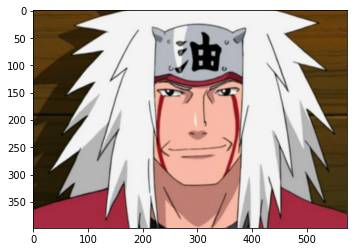

tsunade: 


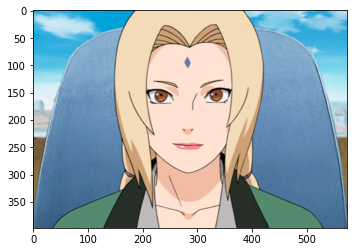

O filho que todos queriam ver: 


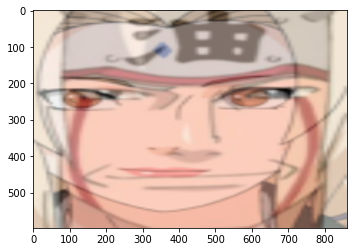

True

In [ ]:
import cv2
import numpy as np

jiraya = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/jiraya.png")
jiraya = cv2.cvtColor(jiraya, cv2.COLOR_BGR2RGB)
tsunade = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/tsunade.png")
tsunade = cv2.cvtColor(tsunade, cv2.COLOR_BGR2RGB)
l, a, _ = jiraya.shape
tsunade = cv2.resize(tsunade,(a,l))
print("jiraya: ")
plt.imshow(jiraya)
plt.show()
print("tsunade: ")
plt.imshow(tsunade)
plt.show()
filho = cv2.addWeighted(tsunade,0.5,jiraya,0.5,0)
filho = cv2.resize(filho, (int(a*0.5),int(l*0.5)))
filho = filho[23:159, 102:197]
filho = cv2.resize(filho, (int(a*2),int(l*2)))
print("O filho que todos queriam ver: ")
plt.imshow(filho)
plt.show()